In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
#reading the file
df=pd.read_excel("Impact of social media on mental health  (Responses).xlsx")
df.head()

,Timestamp,Age,Gender,Social media platform,Average time,Social Media Messaging Frequency,Perceived Social Isolation,Messaging Reducing Isolation,Content Type Affecting Body Image,Social Media Pressure on Appearance,Sentiments Regarding Body Image Content,Nighttime Platform Popularity,Nighttime Social Media Duration,Effect on Sleep Quality,Social Media Impact on Well-Being,Social Media Stress Frequency,Social Media Comparison Rate
0,2024-09-16 23:49:56.743,17-18,Male,"Instagram, YouTube, WhatsApp",1-2 hours,Often,Rarely,Agree,Diet and nutrition content,Neutral,Positive,YouTube,1 – 2 hours,Often,A little,Never,Sometimes
1,2024-09-16 23:50:25.449,19-20,Female,"Twitter (X), LinkedIn, YouTube, WhatsApp",1-2 hours,Often,Never,Neutral,NaN,Strongly disagree,Positive,YouTube,30 minutes – 1 hour,Rarely,A little,Sometimes,Rarely
2,2024-09-16 23:54:18.917,21-22,Male,"Instagram, Twitter (X), Snapchat, LinkedIn, Yo...",2-3hours,Always,Rarely,Agree,Diet and nutrition content,Neutral,Positive,"Instagram, YouTube, Whatsapp",30 minutes – 1 hour,Sometimes,A little,Rarely,Sometimes
3,2024-09-16 23:58:42.103,21-22,Male,"Facebook, Instagram, Twitter (X), Snapchat, Li...",2-3hours,Sometimes,Frequently,Neutral,Photos & videos of models or influencers,Neutral,Neutral,"Facebook, Instagram, YouTube, Whatsapp, Snapchat",30 minutes – 1 hour,Sometimes,Somewhat,Sometimes,Sometimes
4,2024-09-17 00:05:23.828,19-20,Male,"Instagram, YouTube, WhatsApp",2-3hours,Often,Occasionally,Agree,None,Strongly disagree,Neutral,"Instagram, Whatsapp",Less than 30 minutes,Rarely,Quite a bit,Often,Often


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Timestamp                                67 non-null     datetime64[ns]
 1   Age                                      67 non-null     object        
 2   Gender                                   67 non-null     object        
 3   Social media platform                    67 non-null     object        
 4   Average time                             67 non-null     object        
 5   Social Media Messaging Frequency         67 non-null     object        
 6   Perceived Social Isolation               67 non-null     object        
 7   Messaging Reducing Isolation             67 non-null     object        
 8   Content Type Affecting Body Image        65 non-null     object        
 9   Social Media Pressure on Appearance      67 n

In [4]:
df.isnull().sum()

Timestamp                                  0
Age                                        0
Gender                                     0
Social media platform                      0
Average time                               0
Social Media Messaging Frequency           0
Perceived Social Isolation                 0
Messaging Reducing Isolation               0
Content Type Affecting Body Image          2
Social Media Pressure on Appearance        0
Sentiments Regarding Body Image Content    0
Nighttime Platform Popularity              0
Nighttime Social Media Duration            0
Effect on Sleep Quality                    0
Social Media Impact on Well-Being          0
Social Media Stress Frequency              0
Social Media Comparison Rate               0
dtype: int64

In [5]:
df.describe()

,Timestamp
count,67
mean,2024-09-23 09:32:24.395044864
min,2024-09-16 23:49:56.743000
25%,2024-09-17 20:44:17.211500032
50%,2024-09-20 23:21:02.390000128
75%,2024-10-01 21:08:23.886999808
max,2024-10-02 21:13:13.264000


In [6]:
#printing unique values in nighttime social media duration
df["Nighttime Social Media Duration"].unique()

array(['1 – 2 hours', '30 minutes – 1 hour', 'Less than 30 minutes',
       'More than 2 hours'], dtype=object)

In [7]:
df["Effect on Sleep Quality"].unique()

array(['Often', 'Rarely', 'Sometimes', 'Always', 'Never'], dtype=object)

In [16]:
duration_order = ['Less than 30 minutes', '30 minutes \u2013 1 hour', '1 \u2013 2 hours', 'More than 2 hours']
df['Nighttime Social Media Duration Encoded'] = pd.Categorical(df['Nighttime Social Media Duration'], categories=duration_order, ordered=True)
df['Nighttime Social Media Duration Encoded'] = df['Nighttime Social Media Duration Encoded'].cat.codes

# Encode 'Perceived Sleep Quality'
quality_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
df['Effect on Sleep Quality Encoded'] = pd.Categorical(df['Effect on Sleep Quality'], categories=quality_order, ordered=True)
df['Effect on Sleep Quality Encoded'] = df['Effect on Sleep Quality Encoded'].cat.codes

# Create a correlation matrix for relevant variables
correlation_matrix = df[["Nighttime Social Media Duration Encoded", "Effect on Sleep Quality Encoded"]].corr()
print("\
Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                         Nighttime Social Media Duration Encoded  \
Nighttime Social Media Duration Encoded                                 1.000000   
Effect on Sleep Quality Encoded                                        -0.245308   

                                         Effect on Sleep Quality Encoded  
Nighttime Social Media Duration Encoded                        -0.245308  
Effect on Sleep Quality Encoded                                 1.000000  


The correlation matrix shows a negative correlation of -0.245308 between nighttime social media duration and perceived sleep quality. 
This suggests that as nighttime social media use increases, sleep quality tends to decrease slightly.

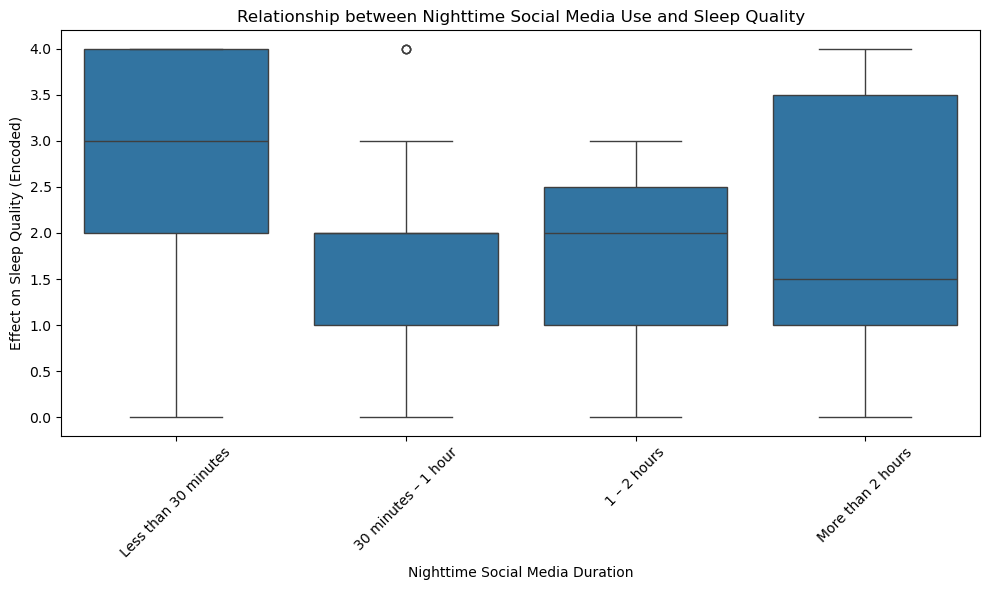

In [10]:
# Visualize the relationship between nighttime social media use and sleep quality
plt.figure(figsize=(10, 6))
sns.boxplot(x="Nighttime Social Media Duration", y="Effect on Sleep Quality Encoded", data=df, order=duration_order)
plt.title("Relationship between Nighttime Social Media Use and Sleep Quality")
plt.xlabel("Nighttime Social Media Duration")
plt.ylabel("Effect on Sleep Quality (Encoded)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

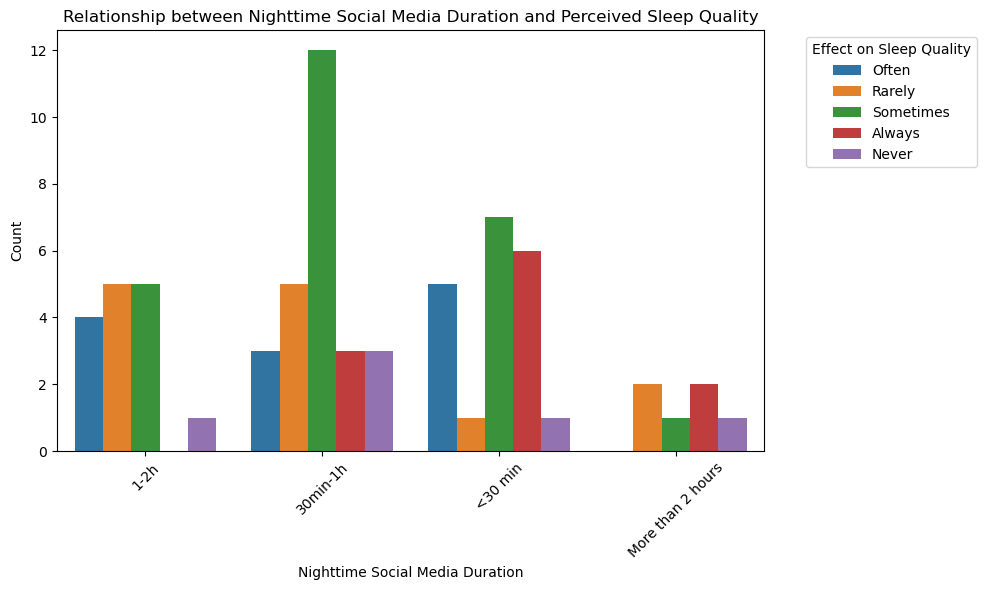

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and prepare data for analysis
# Renaming columns for ease of use
df_cleaned = df[['Nighttime Social Media Duration', 'Effect on Sleep Quality']].copy()

# Cleaning the 'Nighttime Social Media Duration' column by standardizing durations
df_cleaned['Nighttime Social Media Duration'] = df_cleaned['Nighttime Social Media Duration'].replace({
    'Less than 30 minutes': '<30 min', 
    '30 minutes – 1 hour': '30min-1h',
    '1 – 2 hours': '1-2h',
    '2 – 3hours': '2-3h'
})

# Visualizing the relationship between 'Nighttime Social Media Duration' and 'Perceived Sleep Quality'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Nighttime Social Media Duration', hue='Effect on Sleep Quality')
plt.title('Relationship between Nighttime Social Media Duration and Perceived Sleep Quality')
plt.xlabel('Nighttime Social Media Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Effect on Sleep Quality', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [11]:
#PERFORM SPEARMANS RANK CORRELATION TEST
correlation, p_value = stats.spearmanr(df['Nighttime Social Media Duration Encoded'], df['Effect on Sleep Quality Encoded'])
print(f"\
Spearman's rank correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman's rank correlation coefficient: -0.2811995222627143
P-value: 0.02115946739741778


In [12]:
#PERFORM KRUSKAL-WALLIS IS H-TEST
h_statistic,p_value_kw = stats.kruskal(*[group['Effect on Sleep Quality Encoded'].values
                                         for name,group in df.groupby('Nighttime Social Media Duration')])
print(f"\
Kruskal-Wallis H-test:")
print(f"H-statistic:{h_statistic}")
print(f"P-value: {p_value_kw}")


Kruskal-Wallis H-test:
H-statistic:7.025378789754138
P-value: 0.07109324823504636


In [13]:
#PERFORM CHI SQUARE TESTING
import pandas as pd
from scipy import stats

# Create a contingency table for the Chi-Square tes
table = pd.crosstab(df['Nighttime Social Media Duration'], df['Effect on Sleep Quality'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(table)

# Display the results
print("Contingency Table:")
print(table)
print("\
Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)

Contingency Table:
Effect on Sleep Quality          Always  Never  Often  Rarely  Sometimes
Nighttime Social Media Duration                                         
1 – 2 hours                           0      1      4       5          5
30 minutes – 1 hour                   3      3      3       5         12
Less than 30 minutes                  6      1      5       1          7
More than 2 hours                     2      1      0       2          1
Chi-Square Test Results:
Chi-Square Statistic: 15.590686958340802
P-value: 0.21071053545005283
Degrees of Freedom: 12
